<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

### Data Understanding 

### Project Title: Building a Machine Learning Model to Predict Sepsis Status

### Hypothesis
### Null Hypothesis: Patients within the age range of 20 to 40 do not have sepsis
### Alternate Hypothesis: Patients withing the age range of 20 to 40 have sepsis

### Research Questions
#### 1. Is the the target feature (sepsis) balanced?
#### 2. Which age range has the highest number of positive sepsis status?
#### 3. Which of the ranges in the blood pressure category are most patients found?
#### 4. Which of the ranges in (3) has a high number positive sepsis status?
#### 5. Which sepsis status has more insured patients?
#### 6. Is there a relationship between blood pressure, body mass index  and sepsis?
#### 7. Are there variations in the different blood work results and sepsis status?
#### 8. What is the relationship between Age and Blood Pressure Categories and Sepsis?

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...
# %pip install plotly

In [2]:
%pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix


# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression




# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

# Other packages
import os

#importing warning
import warnings
warnings.filterwarnings('ignore')


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [4]:
# For CSV, use pandas.read_csv
# loading train and test data
train_data=pd.read_csv('Paitients_Files_Train.csv')
test_data=pd.read_csv('Paitients_Files_Test.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [5]:
# checking the train dataset
train_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [6]:
#check data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [7]:
#check shape of data
train_data.shape

(599, 11)

In [8]:
#check null values
train_data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [9]:
#check for duplicates
train_data.duplicated().sum()

0

In [10]:
#check unique values
train_data.nunique()

ID           599
PRG           17
PL           129
PR            44
SK            51
TS           164
M11          233
BD2          437
Age           50
Insurance      2
Sepssis        2
dtype: int64

In [11]:
#renaming column names to make it understandable

train_data.rename(columns = {'PRG':'Plasma glucose', 'PL':'Blood Work Result-1',
                              'PR':'Blood Pressure', 'SK':'Blood Work Result-2', 'TS':'Blood Work Result-3', 'M11':'Body mass index', 
                             'BD2':'Blood Work Result-4','Sepssis':'Sepsis'}, inplace = True)

In [12]:
#check renamed columns
train_data.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [13]:
#finding the number of zeros in each column in the train data

zeros_in_each_col = train_data.eq(0).sum()

zeros_in_each_col

ID                       0
Plasma glucose          93
Blood Work Result-1      5
Blood Pressure          28
Blood Work Result-2    175
Blood Work Result-3    289
Body mass index          9
Blood Work Result-4      0
Age                      0
Insurance              188
Sepsis                   0
dtype: int64

In [14]:
'''replacing the zeros in each column. 
NOTE: Insurance has it's values to be 0 and 1 so it will be dropped to perform this operation '''

# create a copy of the train_data which will be used for explorations

train_copy=train_data.copy()
train_copy.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


> - Before the zeros are replaced, a graphical representation can help choose the appropriate central tendancy. The use of either mode or median in this case depends on the presence of outliers. 
> - The mean is suitable for data that is approximately normally distributed without significant outliers.
> - The median is suitable in the presence of outliers, as it is not affected by extreme values.

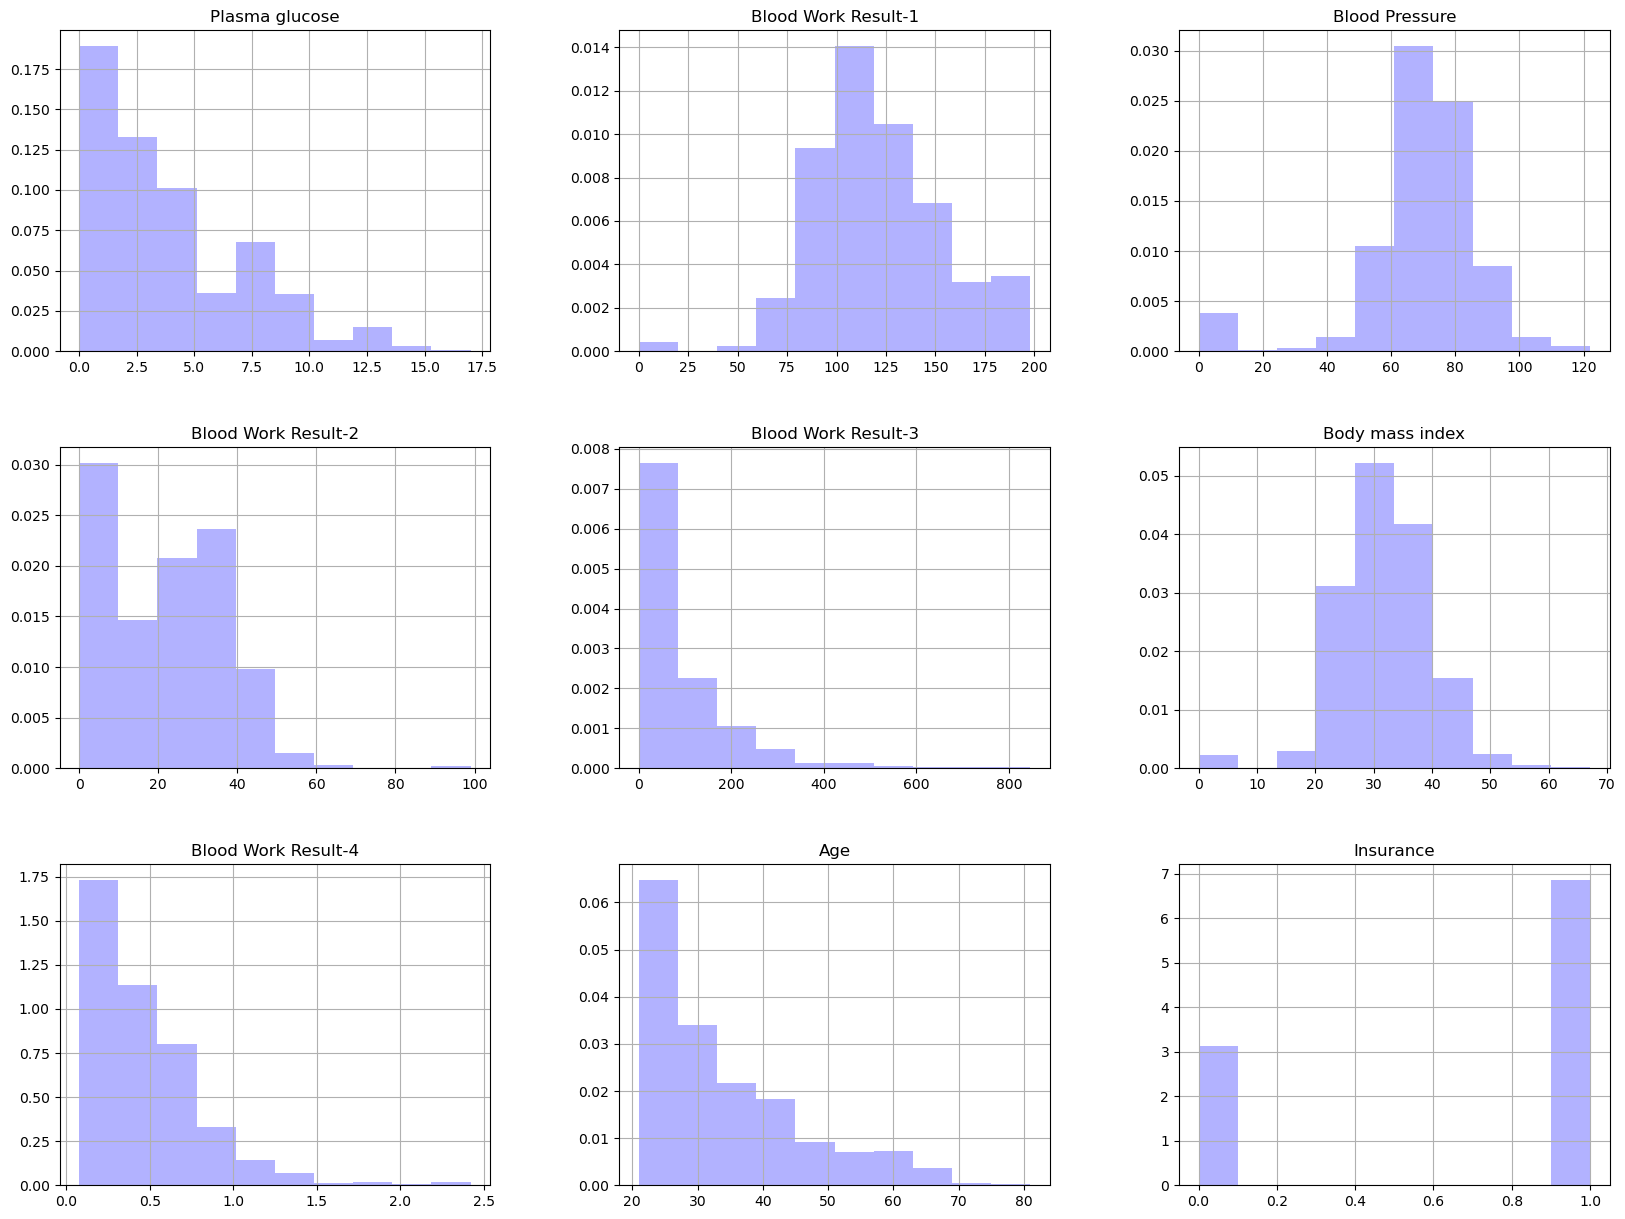

In [15]:
#graphical representation of each column. Note: The Insurance col isn't considered since it values are 0 and 1
train_copy.hist(alpha=0.3, color='b', density=True, figsize=(20,15))
plt.show()

> - The graphical representation shows that the various columns aren't normally distributed and are skewed with outliers present.

> - Hence the median will be used.

In [16]:
'''replacing the zeros in each column. 
NOTE: Insurance has it's values to be 0 and 1 so it will be dropped to perform this operation '''

train_non_zero_cols=train_copy.drop(columns=['Insurance']).columns

train_non_zero_cols



Index(['ID', 'Plasma glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body mass index',
       'Blood Work Result-4', 'Age', 'Sepsis'],
      dtype='object')

In [17]:
# replacing the zeros
train_copy[train_non_zero_cols] = train_copy[train_non_zero_cols].replace(0, train_copy.median())

In [18]:
train_copy.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,36,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,36,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,23,36,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,3,137,40,35,168,43.1,2.288,33,1,Positive


In [19]:
#confirming the zeros has been replaced
zeros_in_each_col = train_copy.eq(0).sum()

zeros_in_each_col

ID                       0
Plasma glucose           0
Blood Work Result-1      0
Blood Pressure           0
Blood Work Result-2      0
Blood Work Result-3      0
Body mass index          0
Blood Work Result-4      0
Age                      0
Insurance              188
Sepsis                   0
dtype: int64

> - Zeros have been replaced 

In [20]:
#descriptive statistics of the train data 
train_copy.describe()

,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance
count,599.000000,599.00000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,4.290484,121.12187,72.005008,27.282137,96.829716,32.400835,0.481187,33.290484,0.686144
std,2.987000,30.76739,11.917146,9.451984,105.589923,6.968917,0.337552,11.828446,0.464447
min,1.000000,44.00000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.00000,64.000000,23.000000,36.000000,27.400000,0.248000,24.000000,0.000000
50%,3.000000,116.00000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.00000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> - The mean age of patients is 33.29. With the minimum and maximum ages been 21 and 81 respectively.

> - The mean blood pressure of patients was 72.0 mm Hg which indicates a normal blood pressure in the blood pressure category.

> - The minimum blood pressure is 24  mm Hg and the maximum is 122  mm Hg

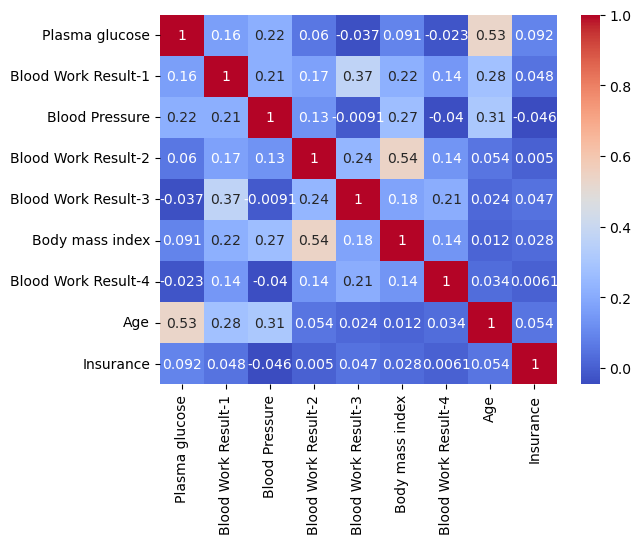

In [21]:
#checking correlation between features

corr=train_copy.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

> -  Features with high correlation between them were age and plasma glucose, and body mass index and blood work results-2.

> - Their correlation were 0.53 and 0.54 respectively.

### Summary of train data information
> - There are 599 rows and 11 columns
> - There are no null values and duplicates
> - There are 599 unique values in the ID column, 2 unique values in both Insurance and Sepsis column
> - Abbreviated names were renamed for more clarity
> - Zeros in various columns were replaced with median value

In [22]:
#checking test dataset
test_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [23]:
#check test data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [24]:
#check shape of test data
test_data.shape

(169, 10)

In [25]:
#check null values
test_data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [26]:
#check duplicates in test data
test_data.duplicated().sum()

0

In [27]:
#check unique values
test_data.nunique()

ID           169
PRG           14
PL            85
PR            33
SK            36
TS            66
M11          122
BD2          156
Age           39
Insurance      2
dtype: int64

In [28]:
#rename columns
test_data.rename(columns = {'PRG':'Plasma glucose', 'PL':'Blood Work Result-1',
                              'PR':'Blood Pressure', 'SK':'Blood Work Result-2', 'TS':'Blood Work Result-3', 'M11':'Body mass index', 
                             'BD2':'Blood Work Result-4'}, inplace = True)
test_data.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [29]:
#finding the number of zeros in each column in the test data

zeros_in_each_col = test_data.eq(0).sum()

zeros_in_each_col

ID                      0
Plasma glucose         18
Blood Work Result-1     0
Blood Pressure          7
Blood Work Result-2    52
Blood Work Result-3    85
Body mass index         2
Blood Work Result-4     0
Age                     0
Insurance              46
dtype: int64

### Summary of test data information
> - There are 169 rows and 11 columns
> - There are no null values and duplicates
> - There are 169 unique values in the ID column, 2 unique values in Insurance column
> - Abbreviated names were renamed for more clarity
> - The test data also had zeros in some columns. This will later be worked on

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

### Answering Research Questions

#### 1. Is the the target feature (sepsis) balanced?

In [30]:
#check the counts of the target feature
counts = train_copy['Sepsis'].value_counts()
counts

Negative    391
Positive    208
Name: Sepsis, dtype: int64

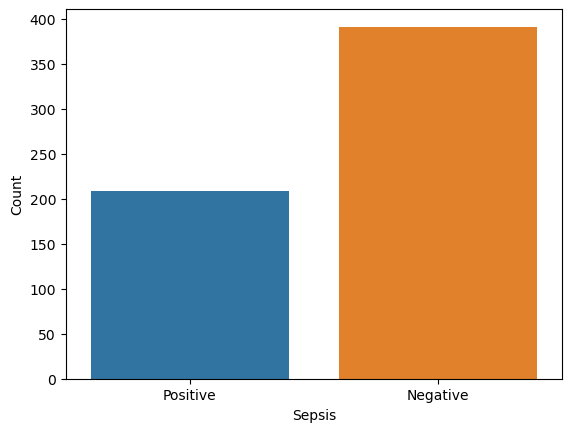

In [31]:
# Create count plot on "Sepsis" column
sns.countplot(x="Sepsis", data=train_copy)

# Add axis labels
plt.xlabel("Sepsis")
plt.ylabel("Count")

# Show plot
plt.show()

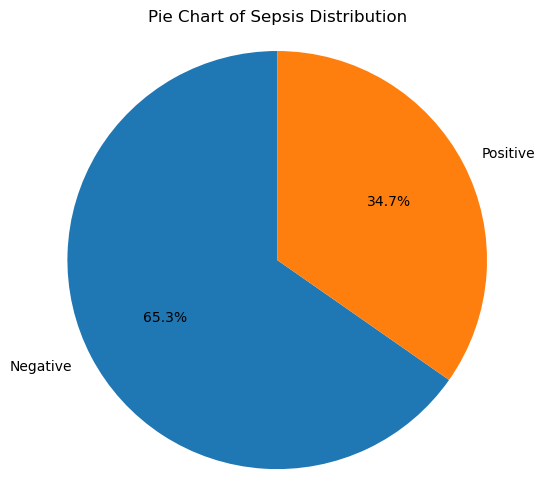

In [32]:
#  Calculate the value counts of the "Sepsis" column
class_counts =train_copy['Sepsis'].value_counts(normalize=True)

# Create a pie chart of the values in the 'Sepsis' column
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart of Sepsis Distribution')

# Show the chart
plt.show()

> - The target feature is imbalanced with 391 negative status representing 65.3%  and 208 positive status representing 34.7% 

#### 2. Which age range has the highest number of positive sepsis status?


In [33]:
# Note: from the describe method performed above, min age: 21 and max age:81
# Define the group ranges
age_ranges = [20, 30, 40, 50, 60, 70, 80, 90]

# Create a new column 'age_group' based on the age ranges
train_copy['age_group'] = pd.cut(train_copy['Age'], bins=age_ranges)

# Display the grouped data
train_copy.head()

,ID,Plasma glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body mass index,Blood Work Result-4,Age,Insurance,Sepsis,age_group
0,ICU200010,6,148,72,35,36,33.6,0.627,50,0,Positive,"(40, 50]"
1,ICU200011,1,85,66,29,36,26.6,0.351,31,0,Negative,"(30, 40]"
2,ICU200012,8,183,64,23,36,23.3,0.672,32,1,Positive,"(30, 40]"
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,"(20, 30]"
4,ICU200014,3,137,40,35,168,43.1,2.288,33,1,Positive,"(30, 40]"


In [38]:
#counting the number of patients in each age range
agerange_count = train_copy['age_group'].value_counts()

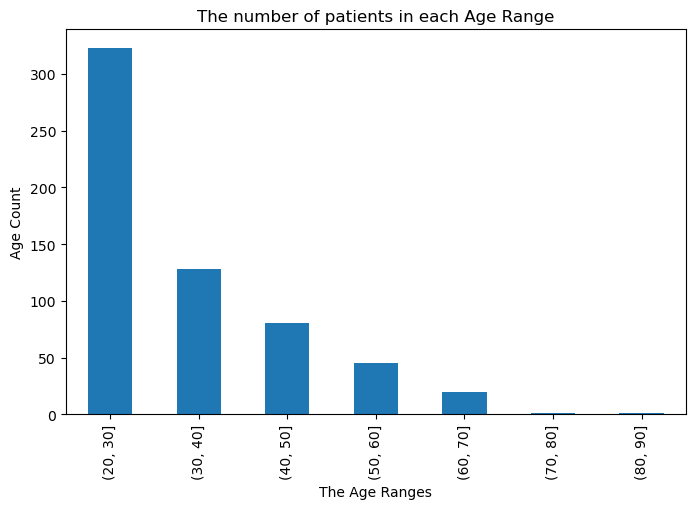

In [39]:

#visualizing age range count
# plot graph
plt.figure(figsize=(8, 5))
agerange_count.plot.bar()
plt.title('The number of patients in each Age Range')
plt.xlabel('The Age Ranges')
plt.ylabel('Age Count')
plt.show()

> - Age range with the highest number is from 20 to 30 years.

In [40]:
# grouping the sepsis into its various status
sepsis_positive=train_copy[train_copy['Sepsis']=='Positive']
sepsis_negative=train_copy[train_copy['Sepsis']=='Negative']

#assigning age group with positive and negative sepsis status 
age_grp_pos=sepsis_positive['age_group']
age_grp_neg=sepsis_negative['age_group']

In [41]:
#assigning a variable to the postive age group
pos_age_grp=age_grp_pos.value_counts()

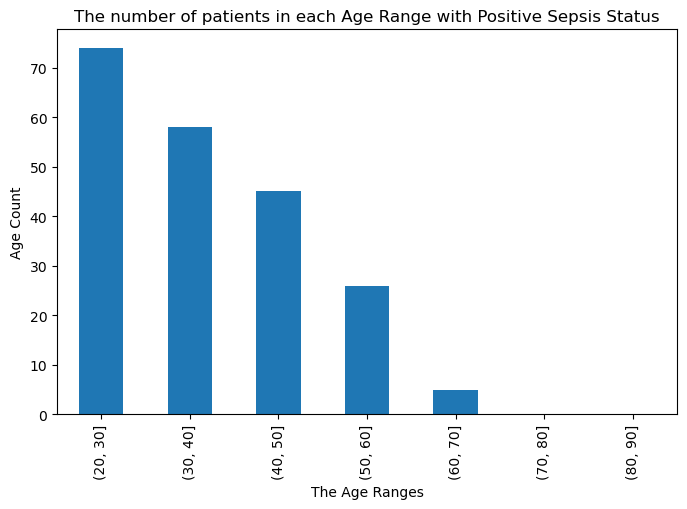

In [43]:
#visualizing age group count
# plot graph
plt.figure(figsize=(8, 5))
pos_age_grp.plot.bar()
plt.title('The number of patients in each Age Range with Positive Sepsis Status')
plt.xlabel('The Age Ranges')
plt.ylabel('Age Count')
plt.show()

> - From the visualization it can be seen that the highest age range also has the highest number positive sepsis status of 74.

#### 3. Which of the ranges in the blood pressure category are most patients found?

> - The blood pressure categories are : Normal, Elevated and High  

> - From the describe method used on the train data the min and max values of the blood pressure are: 24  mm Hg and 122  mm Hg respectively



In [44]:
# function to create a new column for blood pressure ranges
def blood_pressure_ranges(row):
    if row['Blood Pressure'] < 80:
        return 'normal'
    elif row['Blood Pressure'] >= 80 and row['Blood Pressure'] <= 89:
        return 'elevated'
    elif row['Blood Pressure'] >= 90:
        return 'high'

In [45]:
# create new column
train_copy['Blood pressure category'] = train_copy.apply(blood_pressure_ranges, axis=1)
train_copy['Blood pressure category'].head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: Blood pressure category, dtype: object

In [46]:
#assigning a variable to the BP range
BP_range = train_copy['Blood pressure category'].value_counts()

In [47]:
BP_range

normal      446
elevated    106
high         47
Name: Blood pressure category, dtype: int64

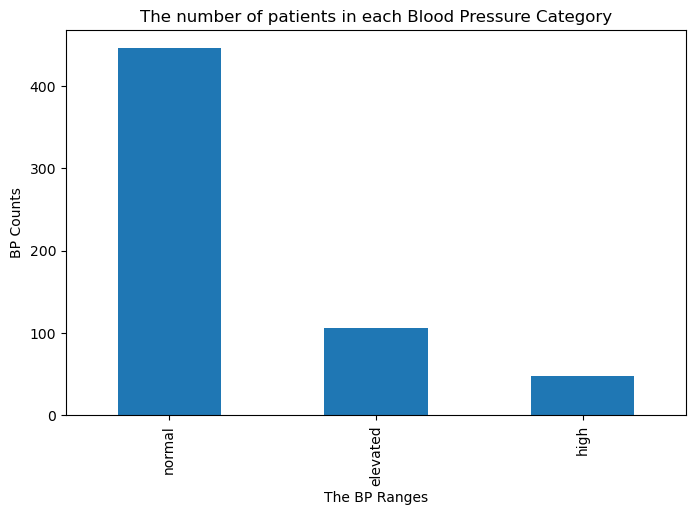

In [48]:
#plot graph 
plt.figure(figsize=(8, 5))
BP_range.plot.bar()
plt.title('The number of patients in each Blood Pressure Category')
plt.xlabel('The BP Ranges')
plt.ylabel('BP Counts')
plt.show()

> - Most of the patients (446) are in the normal category 

#### 4. Which of the ranges in (3) has a high number positive sepsis status

In [49]:
# grouping the sepsis into its various status
sepsis_positive=train_copy[train_copy['Sepsis']=='Positive']
sepsis_negative=train_copy[train_copy['Sepsis']=='Negative']

#assigning age group with positive and negative sepsis status 
BP_grp_pos=sepsis_positive['Blood pressure category']
BP_grp_neg=sepsis_negative['Blood pressure category']



In [50]:
#assigning a variable to the postive age group
pos_BP_grp=BP_grp_pos.value_counts()
pos_BP_grp

normal      140
elevated     45
high         23
Name: Blood pressure category, dtype: int64

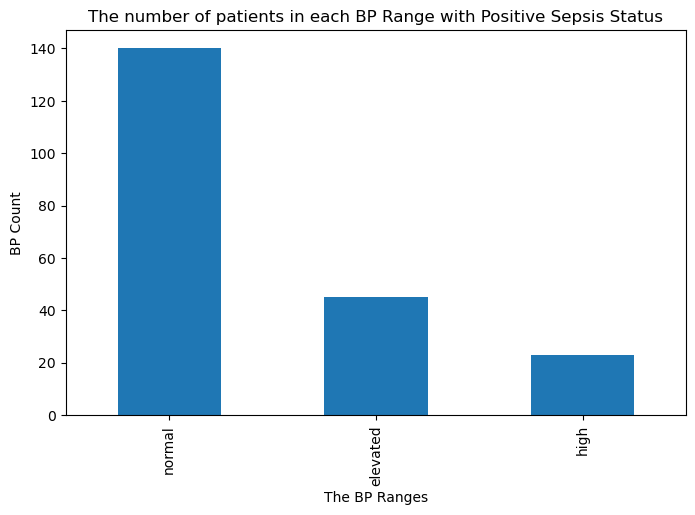

In [51]:
#visualizing age group count
# plot graph
plt.figure(figsize=(8, 5))
pos_BP_grp.plot.bar()
plt.title('The number of patients in each BP Range with Positive Sepsis Status')
plt.xlabel('The BP Ranges')
plt.ylabel('BP Count')
plt.show()

> - Patients (140) with normal blood pressure also have the highest positive status

#### 5. Which sepsis status has more insured patients?

In [52]:
# grouping the sepsis into its various status
sepsis_positive=train_copy[train_copy['Sepsis']=='Positive']
sepsis_negative=train_copy[train_copy['Sepsis']=='Negative']

#assigning age group with positive and negative sepsis status 
Ins_grp_pos=sepsis_positive['Insurance']
Ins_grp_neg=sepsis_negative['Insurance']


In [53]:
#assigning a variable to the postive insured group
pos_Ins_grp=Ins_grp_pos.value_counts()
pos_Ins_grp

1    151
0     57
Name: Insurance, dtype: int64

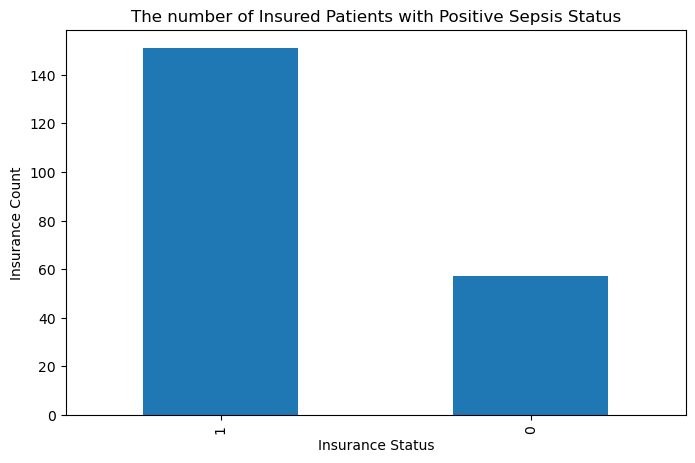

In [54]:
#visualizing age group count
# plot graph
plt.figure(figsize=(8, 5))
pos_Ins_grp.plot.bar()
plt.title('The number of Insured Patients with Positive Sepsis Status')
plt.xlabel('Insurance Status')
plt.ylabel('Insurance Count')
plt.show()

> - Most insured patients (151) have positive sepsis status

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

#### 6. Is there a relationship between blood pressure, body mass index  and sepsis?

In [55]:
#create another copy of the train_copy
train_copy1=train_copy.copy()

In [56]:
#  change values in churn column into numerical data
train_copy1['Sepsis'] = (train_copy1['Sepsis'] == 'Positive').astype(bool).astype(int)
train_copy1['Sepsis'].unique()

array([1, 0])

In [57]:
#drop the ID column 
train_copy1= train_copy1.drop([ 'ID'], axis = 1)

In [58]:
#create a correlation matrix
corr_matrix = train_copy1.corr()

In [59]:
#check how feature correlate with target (Sepsis)
corr_matrix['Sepsis'].sort_values(ascending=False)


Sepsis                 1.000000
Blood Work Result-1    0.481200
Body mass index        0.328757
Plasma glucose         0.235664
Age                    0.210234
Blood Work Result-2    0.189849
Blood Work Result-4    0.181561
Blood Pressure         0.166669
Blood Work Result-3    0.166630
Insurance              0.062582
Name: Sepsis, dtype: float64

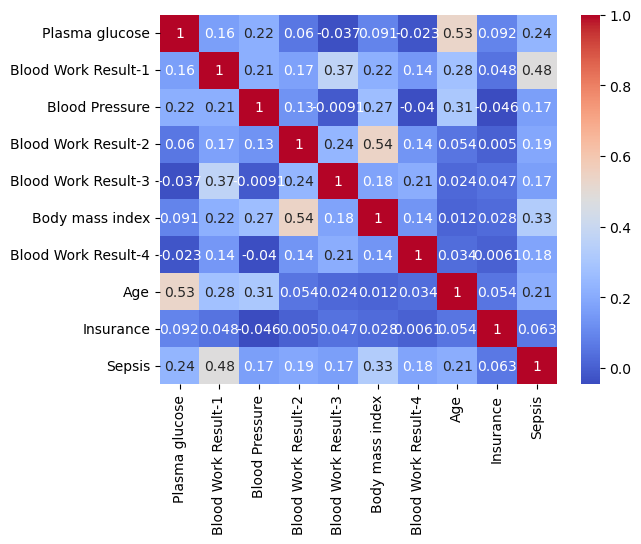

In [60]:
#create heatmap to check correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

> -   The correlation between the various features and the target feature are positive but very weak. The only feature which had a bit of strong correlation with the target feature is the Blood work result-1. It's correlating at 0.48 which can be approximately 0.5 

> - Blood pressure and  body mass index are correlating with sepsis at 0.17 and 0.33 respectively 

#### 7. Are there variations in the different blood work results and sepsis status?

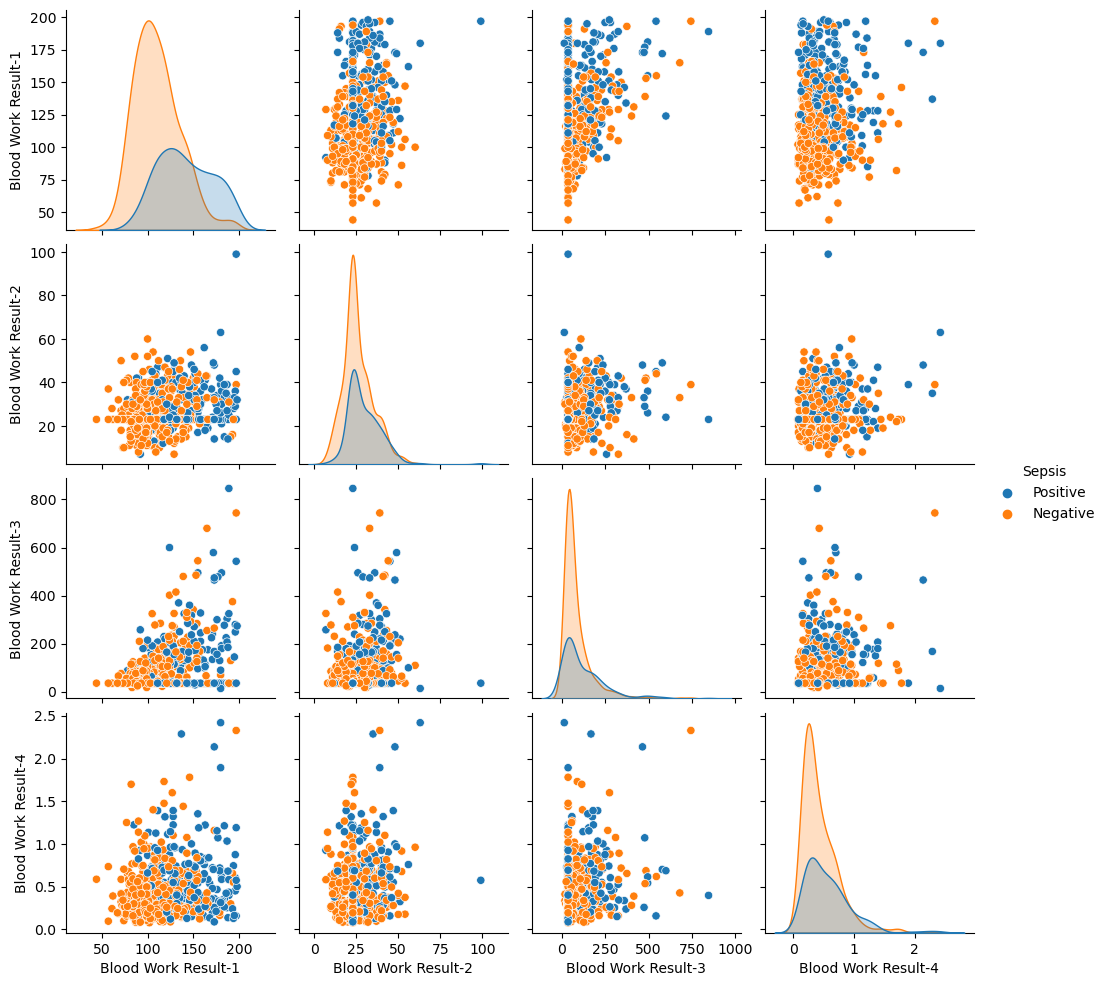

In [61]:
#graphical representation of the various blood results with sepsis status
blood_results = ['Blood Work Result-1','Blood Work Result-2', 'Blood Work Result-3', 'Blood Work Result-4']
sns.pairplot(data=train_copy, vars=blood_results, hue='Sepsis')

> - Since the target feature is imbalanced, it can be seen that the negative sepsis status dominates in the various blood work results

#### 8. What is the relationship between Age and Blood Pressure Categories and Sepsis?

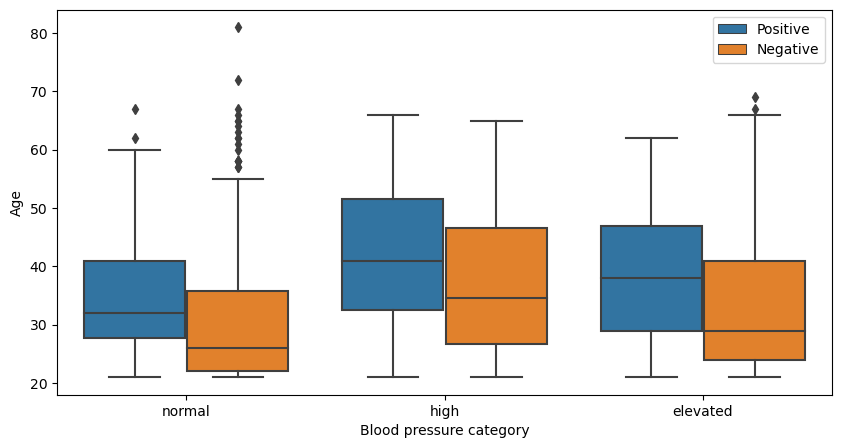

In [62]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_copy, y='Age', x='Blood pressure category', hue='Sepsis');

plt.legend();

> - Most patients with positive sepsis status have high blood pressure and were between the ages of 21 to 69.

> - The normal category with the highest number had less patients with positive sepsis status.

In [ ]:
train_copy.head()

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [ ]:
# We wil be using the main train data now

#Checking duplicates

# train_data.duplicated().sum()

There are no duplicates

## Impute Missing Values

In [ ]:
# Use sklearn.impute.SimpleImputer

#check for missing values

# train_data.isnull().sum()

In [ ]:
# train_data.head()

## Dataset Splitting

In [ ]:
# Use train_test_split with a random_state, and add stratify for Classification

In [ ]:
# drop ID and Insurance. Insurance is been dropped because the determination of sepsis is bodily related. 
# train_data = train_data.drop(columns=['ID', 'Insurance'])
# train_data['Sepsis']

In [ ]:
#  change values in sepsis column into numerical data
# train_data['Sepsis'] = (train_data['Sepsis'] == 'Positive').astype(bool).astype(int)
# train_data['Sepsis'].unique()

# train_data['Sepsis'] = train_data['Sepsis'].map({'Positive': 1, 'Negative': 0})
# train_data['Sepsis'].unique()

In [ ]:
#spliting data into  80% train and  20% test

# train, test = train_test_split(train_data, test_size=0.2, random_state=42)

In [ ]:
# check and confirm the shape of the train and test data
# train.shape, test.shape

In [ ]:
# create features and targets from the train and test
# X_train = train.drop(columns=['Sepsis'])
# y_train = train['Sepsis'].copy()

# X_eval = test.drop(columns=['Sepsis'])
# y_eval = test['Sepsis'].copy()

In [ ]:
# display head fo the train features dataframe
# X_train.head()

In [ ]:
# display head for the test features dataframe

# X_eval.head()

## Create Pipeline to Impute Missing Values, Encode columns and Scale Columns

In [ ]:
# check the number of misssing values in the train data
# X_train.isnull().sum()

In [ ]:
#creating train and eval numerical variable

# train_num = X_train.columns

# eval_num = X_eval.columns


In [ ]:
#viewing the cols
# train_num, eval_num

In [ ]:
# create variables to hold numerical columns 

# num_attribs = list(train_num)

In [ ]:
#create a numerical pipeline to standardize and impute using median strategy for outliers in the numerical columns
# num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

In [ ]:
# Create a fullpipeline for numerical pipeline
# full_pipeline = ColumnTransformer([("numerical",num_pipeline, num_attribs)], remainder='passthrough')

In [ ]:
# use create pipeline to transform train and eval features
# X_train_prepared = full_pipeline.fit_transform(X_train)
# X_eval_prepared = full_pipeline.transform(X_eval)

In [ ]:
# X_train_prepared

In [ ]:
# Create a new datframe for the train and eval feature
# labels = train_num
# X_train_ = pd.DataFrame(X_train_prepared, columns=labels)
# X_eval_ = pd.DataFrame(X_eval_prepared, columns=labels)

## Optional: Train Dataset Balancing 

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

In [ ]:
# Count the number of unique values in the target
# y_train.value_counts()

In [ ]:
# Create an instance of SMOTE and fit it on the train feature and targets
# sm = SMOTE(sampling_strategy='minority')
# X_train_, y_train = sm.fit_resample(X_train_, y_train)

In [ ]:
# let's confirm the increase in rows after oversampling
# len(X_train_), len(y_train)

In [ ]:
# Confirm values counts for the targets
# y_train.value_counts()

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Decision Tree

Please, keep the following structure to try all the model you want.

### Create the Model

In [ ]:
# let's create a decision tree model
# dclf = DecisionTreeClassifier()

### Train the Model

In [ ]:
# Use the .fit method to train the model
# dclf.fit(X_train_, y_train)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

# def evaluate_model(model, test, y_true):
#     # Compute the valid metrics for the use case # Optional: show the classification report
#     pred = model.predict(test)
#     F1 = f1_score(y_true, pred)
#     Recall = recall_score(y_true, pred)
#     AUC = roc_auc_score(y_true, pred)
    
 
   
#     return Recall, AUC, F1, pred

### Results of the model on train set

In [ ]:
# Recall_dclf, Auc_dclf, F1_dclf, dclf_pred = evaluate_model(dclf, X_train_, y_train)

In [ ]:
# train_results = pd.DataFrame([['Decision Tree Train', Recall_dclf, Auc_dclf, F1_dclf]], columns = ['Model', 'Recall', 'AUC','F1_score'])
# train_results

### Results of the model on evaluation set

In [ ]:
# dclf_eval = DecisionTreeClassifier()
# dclf_eval.fit(X_train_, y_train)

In [ ]:
# Recall_dclf_eval, Auc_dclf_eval, F1_dclf_eval, dclf_eval_pred = evaluate_model(dclf_eval, X_eval_, y_eval)

In [ ]:
# eval_results = pd.DataFrame([['Decision Tree Eval', Recall_dclf_eval, Auc_dclf_eval, F1_dclf_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])
# eval_results

# combined_results_dclf= pd.concat([train_results, eval_results], ignore_index=True)
# combined_results_dclf

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## RandomForest

### Create the Model

In [ ]:
# rfc = RandomForestClassifier()

In [ ]:
# Use the .fit method
# rfc.fit(X_train_, y_train)

### Evaluate the Model on the Evaluation dataset (Evalset)

### Results of the model on train set

In [ ]:
# Recall_rfc, Auc_rfc, F1_rfc, rfc_pred = evaluate_model(rfc, X_train_, y_train)

In [ ]:



# train_results1 = pd.DataFrame([['RandomForest Train', Recall_rfc, Auc_rfc, F1_rfc]], columns = ['Model', 'Recall', 'AUC','F1_score'])
# train_results1

### Results of the model on evaluation set

In [ ]:
# rfc_eval = RandomForestClassifier()

In [ ]:
# rfc_eval.fit(X_train_, y_train)

In [ ]:
# Recall_rfc_eval, Auc_rfc_eval, F1_rfc_eval, rfc_eval_pred = evaluate_model(rfc_eval, X_eval_, y_eval)

In [ ]:
# eval_results1 = pd.DataFrame([['RandomForest Eval', Recall_rfc_eval, Auc_rfc_eval, F1_rfc_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# eval_results1

# combined_results_rfc= pd.concat([train_results1, eval_results1], ignore_index=True)

# combined_results_rfc

## KNeighbors Classifier

### Create model

In [ ]:
# knn = KNeighborsClassifier()

### Train the Model

In [ ]:
# Use the .fit method
# knn.fit(X_train_, y_train)

### Evaluate the Model on the Evaluation dataset (Evalset)

### Results of the model on train set

In [ ]:
# Recall_knn, Auc_knn, F1_knn, knn_pred = evaluate_model(knn, X_train_, y_train)



In [ ]:
# train_results2 = pd.DataFrame([['KNeighbors Train', Recall_knn, Auc_knn, F1_knn]], columns = ['Model', 'Recall', 'AUC','F1_score'])
# train_results2

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 
# accuracy_knn, precision_knn, recall_knn, F1_knn, F2_knn, knn_pred = evaluate_model(knn, X_eval_, y_eval)

### Results of the model on evaluation set

In [ ]:
# knn_eval = KNeighborsClassifier()


In [ ]:
# knn_eval.fit(X_train_, y_train)

In [ ]:
# Recall_knn_eval, Auc_knn_eval, F1_knn_eval, knn_eval_pred = evaluate_model(knn_eval, X_eval_, y_eval)

In [ ]:

# eval_results2 = pd.DataFrame([['KNeighbors Eval', Recall_knn_eval, Auc_knn_eval, F1_knn_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# eval_results2

# combined_results_knn= pd.concat([train_results2, eval_results2], ignore_index=True)

# combined_results_knn

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Support Vector Machine

### Create model

In [ ]:

# svm = svm.SVC()

### Train model

In [ ]:
# Use the .fit method

# svm.fit(X_train_, y_train)

### Evaluate the Model on the Evaluation dataset (Evalset)

### Results of the model on train set

In [ ]:
# Recall_svm, Auc_svm, F1_svm, svm_pred = evaluate_model(svm, X_train_, y_train)

In [ ]:
# train_results3 = pd.DataFrame([['SVM Train',Recall_svm, Auc_svm, F1_svm]], columns = ['Model', 'Recall', 'AUC','F1_score'])
# train_results3

### Results of the model on evaluation set

In [ ]:
# Recall_svm_eval, Auc_svm_eval, F1_svm_eval, svm_eval_pred = evaluate_model(svm, X_eval_, y_eval)


In [ ]:
# eval_results3 = pd.DataFrame([['SVM Eval', Recall_svm_eval, Auc_svm_eval, F1_svm_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# eval_results3

# combined_results_SVM= pd.concat([train_results3, eval_results3], ignore_index=True)

# combined_results_SVM

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Logistic Regression

### Create model

In [ ]:
#  lgr_model = LogisticRegression()

### Train model

In [ ]:
# Use the .fit method
# lgr_model.fit(X_train_, y_train)

### Evaluate the Model on the Evaluation dataset (Evalset)

### Results of the model on train set

In [ ]:
# Recall_lgr_model, Auc_lgr_model, F1_lgr_model, lgr_model_pred = evaluate_model(lgr_model, X_train_, y_train)

In [ ]:
# train_results4 = pd.DataFrame([['LGR Train', Recall_lgr_model, Auc_lgr_model, F1_lgr_model]], columns = ['Model', 'Recall', 'AUC','F1_score'])
# train_results4

### Results of the model on evaluation set

In [ ]:
# Recall_lgr_model_eval, Auc_lgr_model_eval, F1_lgr_model_eval, lgr_model_eval_pred = evaluate_model(lgr_model, X_eval_, y_eval)

In [ ]:
# eval_results4 = pd.DataFrame([['LGR Eval', Recall_lgr_model_eval, Auc_lgr_model_eval, F1_lgr_model_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# eval_results4

# combined_results_LGR= pd.concat([train_results4, eval_results4], ignore_index=True)

# combined_results_LGR

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

In [ ]:
# Model_results=pd.concat([ combined_results_dclf, combined_results_rfc, combined_results_knn, combined_results_SVM, combined_results_LGR], ignore_index=True)

# Model_results

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [ ]:
#combining all the trained models
# Model_comparison=pd.concat([eval_results, eval_results1, eval_results2, eval_results3, eval_results4], ignore_index=True)
# Model_comparison

In [ ]:
#renaming model names

# replacement_mapping = {'Decision Tree Eval': 'DecisionTree Classifier', 
#                        'RandomForest Eval':'RandomForest Classifier','KNeighbors Eval': 'KNeighbors' ,
#                        'SVM Eval':'Support Vector Machine', 'LGR Eval':'Logistic Regression'}

# Model_comparison['Model'] = Model_comparison['Model'].replace(replacement_mapping)



In [ ]:
# Model_comparison

In [ ]:
#
# Model_comparison=  Model_comparison.sort_values(by='Recall', ascending=False)
# Model_comparison.set_index('Model', inplace =True)

# Model_comparison

In [ ]:
# plot the bar chart
# ax = Model_comparison.plot(kind='bar', figsize=(10, 6))

# # set the title and labels
# ax.set_title('Model Performance Comparison', fontsize=18)
# ax.set_xlabel('Metrics', fontsize=14)
# ax.set_ylabel('Scores', fontsize=14)

# # set the legend
# ax.legend(fontsize=7)

# # show the plot
# plt.show()

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

### Support Vector Machine

In [ ]:
# defining parameter grid
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train_, y_train)

In [ ]:
 #print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [ ]:
# def hyper_model(grid, test, y_true):
#     # Compute the valid metrics for the use case # Optional: show the classification report
#     grid_predictions = grid.predict(test)
#     F1 = f1_score(y_true, grid_predictions)
#     Recall = recall_score(y_true, grid_predictions)
#     AUC = roc_auc_score(y_true, grid_predictions)
    
 
   
#     return Recall, AUC, F1, grid_predictions

In [ ]:
# Recall_svm, Auc_svm, F1_svm, svm_grid_predictions = hyper_model(grid, X_eval_, y_eval)

In [ ]:
# hyper_results = pd.DataFrame([['Support Vector Machine', Recall_svm, Auc_svm, F1_svm]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# hyper_results

In [ ]:
# grid_predictions = grid.predict(X_eval_)
  
# # print classification report
# print(classification_report(y_eval, grid_predictions))

In [ ]:
# eval_results3 = pd.DataFrame([['SVM Eval', Recall_svm_eval, Auc_svm_eval, F1_svm_eval]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# eval_results3

### Logistic Regression

In [ ]:
#defining parameter grid
# params = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['lbfgs', 'liblinear'],
#     'max_iter': [100, 500, 1000],
# }


# grid_lgr= GridSearchCV(lgr_model, params, cv=5, verbose=1)

# # fitting the model for grid search
# grid_lgr.fit(X_train_, y_train)

In [ ]:
#  #print best parameter after tuning
# print(grid_lgr.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid_lgr.best_estimator_)

In [ ]:
# Recall_lgr_model, Auc_lgr_model, F1_lgr_model, lgr_model_grid_predictions = hyper_model(grid_lgr, X_eval_, y_eval)

In [ ]:
# hyper_results1 = pd.DataFrame([['Logistic Regression', Recall_lgr_model, Auc_lgr_model, F1_lgr_model]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# hyper_results1

### KNeighbors

In [ ]:
# # Define the hyperparameter grid
# param_grid = {'n_neighbors': [3, 5, 7],
#               'weights': ['uniform', 'distance'],
#               'metric': ['euclidean', 'manhattan']}


# grid_knn = GridSearchCV(knn, param_grid, cv=5)

# # fitting the model for grid search
# grid_knn.fit(X_train_, y_train)

In [ ]:
#  #print best parameter after tuning
# print(grid_knn.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid_knn.best_estimator_)

In [ ]:
# Recall_knn, Auc_knn, F1_knn, knn_grid_predictions = hyper_model(grid_knn, X_eval_, y_eval)

In [ ]:
# hyper_results2 = pd.DataFrame([['KNeighbors', Recall_knn, Auc_knn, F1_knn]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# hyper_results2

### RandomForest

In [ ]:
# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['auto']
# }

# grid_rfc = GridSearchCV(rfc, param_grid, cv=3)

# # fitting the model for grid search
# grid_rfc.fit(X_train_, y_train)

In [ ]:
#print best parameter after tuning
# print(grid_rfc.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid_rfc.best_estimator_)

In [ ]:
# Recall_rfc, Auc_rfc, F1_rfc, knn_grid_predictions = hyper_model(grid_knn, X_eval_, y_eval)

In [ ]:
# hyper_results3 = pd.DataFrame([['RandomForest', Recall_rfc, Auc_rfc, F1_rfc]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# hyper_results3

### DecisionTree

In [ ]:
# param_grid =  {
#     'min_samples_leaf': [1, 2, 3],
#     'max_depth': [1, 2, 3]
# }
# grid_dclf = GridSearchCV(dclf,param_grid,cv=10,verbose=2)
                    
                    
            
                    


In [ ]:
# grid_dclf.fit(X_train_, y_train)

In [ ]:
# #print best parameter after tuning
# print(grid_dclf.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid_dclf.best_estimator_)

In [ ]:
# Recall_dclf, Auc_dclf, F1_dclf, dclf_grid_predictions = hyper_model(grid_dclf, X_eval_, y_eval)

In [ ]:
# hyper_results4 = pd.DataFrame([['DecisionTree', Recall_dclf, Auc_dclf, F1_dclf]], columns = ['Model', 'Recall', 'AUC','F1_score'])

# hyper_results4

### Combining tuned models

In [ ]:
#combining all the tuned models
# Hyper_results=pd.concat([hyper_results, hyper_results1, hyper_results2, hyper_results3, hyper_results4], ignore_index=True)
# Hyper_results

In [ ]:
#Results before performing hyperparameter tuning

# Model_comparison

In [ ]:
#Results after performing hyperparameter tuning
# Hyper_results=  Hyper_results.sort_values(by='Recall', ascending=False)
# Hyper_results.set_index('Model', inplace =True)

# Hyper_results

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [ ]:
#  import pickle

In [ ]:
# Put the key components in a dictionary
# model_dict = {"model": grid_dclf.best_estimator_, "pipeline": full_pipeline, "num_pipe":num_pipeline}

In [ ]:
# Save the dictionary as a pickle file
# with open("sepsis.pkl", "wb") as f:
#       pickle.dump(model_dict, f)

### Preprocessing the test data to try the model on it

In [ ]:
# test_data.head()

In [ ]:
# test_data.isnull().sum()

In [ ]:
# test = test_data.drop(columns=['ID', 'Insurance'])

In [ ]:
# test_num = test.columns



In [ ]:
# test_num

In [ ]:
# num_attribs = list(test_num)

In [ ]:
#create a numerical pipeline to standardize and impute using median strategy for outliers in the numerical columns
# num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

In [ ]:
# Create a fullpipeline for numerical pipeline
# full_pipeline = ColumnTransformer([("numerical",num_pipeline, num_attribs)], remainder='passthrough')

In [ ]:
# use create pipeline to transform train and eval features
# test_prepared = full_pipeline.transform(test)
# test_prepared

In [ ]:
# test_prepared.shape

In [ ]:
#re_loading the model
# model =pickle.load(open('sepsis.pkl','rb'))
# model

In [ ]:
#  Load the saved model from the pickle file
# with open('path/to/saved/model.pkl', 'rb') as file:
#     loaded_dict = pickle.load(file)

# Extract the model from the dictionary
# best_model = model['model']

# # Assuming test_data contains your preprocessed test data

# best_model

In [ ]:
#making predictions using the test dataset


# predictions=best_model.predict(test_prepared)
# predictions

In [ ]:
# submission = pd.DataFrame( {"ID": test_data['ID'], "Sepsis": predictions})

In [ ]:
# submission['Sepsis'] = submission['Sepsis'].map({1: 'Positive', 0: 'Negative'})

In [ ]:
# submission.to_csv('submission_file.csv', index=False)